# Transition Test

In this notebook we test for transitions in our stochastic integrations

In [1]:
import xarray as xr
import os
import random
import numpy as np
from tqdm.notebook import tqdm

In [2]:
data_dir = '/rds/general/user/cfn18/ephemeral/Stochastic-Well/DATA/eps0_01/coarse/'

In [3]:
os.listdir(data_dir)

['alpha_1_0', 'alpha_0_5', 'alpha_0_25', 'alpha_0_0']

In [48]:
ds = xr.open_mfdataset(file_list, concat_dim='realisation').reset_index('realisation')

/rds/general/user/cfn18/home/anaconda3/envs/personalpy3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
/rds/general/user/cfn18/home/anaconda3/envs/personalpy3/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alt

In [63]:
ds.x

<xarray.Dataset>
Dimensions:      (realisation: 500, time: 100)
Coordinates:
  * realisation  (realisation) int64 1 2 3 4 5 6 7 ... 495 496 497 498 499 500
  * time         (time) float64 0.0 0.1 0.2 0.3 0.4 0.5 ... 9.5 9.6 9.7 9.8 9.9
Data variables:
    x            (realisation, time) float64 -1.0 -0.977 -1.01 ... -1.013 -1.034
    y            (realisation, time) float64 ...
Attributes:
    alpha:    0.5
    eps:      0.01

In [4]:
alpha_dirs = [data_dir + a + '/' for a in os.listdir(data_dir)]
cold_dirs = [a + 'cold-ensemble/' for a in alpha_dirs]
hot_dirs = [a + 'hot-ensemble/' for a in alpha_dirs]

In [20]:

# for d in tqdm(cold_dirs):
d = cold_dirs[-1]

file_list = [d + f for f in os.listdir(d)]

for file in tqdm(file_list):
    with xr.open_dataset(file) as ds:
        if (np.sum((ds.x > 0).values) > 0):
            print(file)


KeyboardInterrupt: 

In [22]:
mx_file_list=[]


# for d in tqdm(cold_dirs):
d =cold_dirs[-1]
mx = -1

file_list = [d + f for f in os.listdir(d)]

for file in tqdm(file_list[257:]):
    with xr.open_dataset(file) as ds:
        if (ds.x.max().item() > mx):
            mx = ds.x.max().item()
            print(mx)
            mx_file = file
mx_file_list.append(mx_file)


-0.6757407513339139
-0.6645589981666714
-0.6247793467828405
-0.6094383792738084



In [23]:
mx_file

'/rds/general/user/cfn18/ephemeral/Stochastic-Well/DATA/eps0_01/coarse/alpha_0_0/cold-ensemble/531.nc'

In [24]:
mx_ds = []
for f in mx_file_list:
    mx_ds.append(xr.open_dataset(f))

In [30]:
import matplotlib.pyplot as plt

In [26]:
ds = mx_ds[0]

In [28]:
ind = np.unravel_index(np.argmax(ds.x, axis=None), ds.x.shape)
ind

(7, 2929)

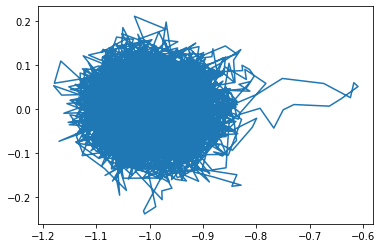

In [31]:
plt.plot(ds.x[7], ds.y[7])

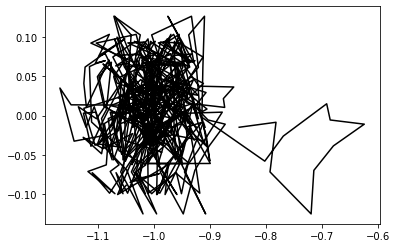

In [151]:
plt.plot(mx_ds[2].x[200], mx_ds[2].y[200], 'k')
plt.plot(mx_ds[2].x[305], mx_ds[2].y[305], 'k')
plt.plot(mx_ds[2].x[302], mx_ds[2].y[305], 'k')
plt.plot(mx_ds[2].x[304], mx_ds[2].y[305], 'k')
plt.plot(mx_ds[2].x[1], mx_ds[2].y[305], 'k')
plt.plot(mx_ds[2].x[2], mx_ds[2].y[305], 'k')

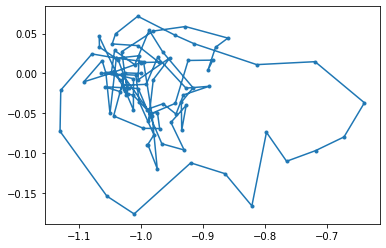

In [135]:
plt.plot(mx_ds[0].isel(realisation = 390).x, mx_ds[0].isel(realisation = 390).y, '.-')